# <center> Unidad 3: Análisis de datos con Tableau</center>

## Introdución
En esta lección realizaremos análisis de datos combinando la técnica de **árboles de decisión** y visualización de datos con **Tableau**.

## Árboles de decisión
Los **árboles de decisión** son un método de análisis que se utiliza en diversas áreas, como la medicina, los negocios, la estadística, la ingeniería y la inteligencia artificial, para tomar decisiones informadas basadas en múltiples opciones y posibles resultados. Un árbol de decisión se representa gráficamente como una estructura jerárquica de nodos, donde cada nodo representa una decisión a tomar y cada rama representa una posible consecuencia de esa decisión.

En Big Data, **los árboles de decisión** son un algoritmo de aprendizaje supervisado no paramétrico que se utiliza para tareas de clasificación y regresión. Su estructura jerárquica se compone de un nodo raíz, ramas, nodos internos y nodos hoja.


Los **árboles de decisión** son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

Los métodos basados en árboles se han convertido en uno de los referentes dentro del ámbito predictivo debido a los buenos resultados que generan en problemas muy diversos. A lo largo de este documento se explora la forma en que se construyen y predicen los árboles de decisión (clasificación y regresión), elementos fundamentales de modelos predictivos más complejos como **Random Forest** y **Gradient Boosting Machine**.


En general, los **árboles de decisión** son una herramienta visual que ayuda a comprender mejor las opciones disponibles y los posibles resultados de cada acción, lo que permite una toma de decisiones más informada y precisa. Algunas de las ventajas de utilizar árboles de decisión incluyen su capacidad para manejar grandes cantidades de datos y su facilidad de interpretación.

# Caso práctico

Este material expande el marco inicial de la temática en un contexto del análisis y resolución de un caso práctico con Python y Tableau. Tiene por objetivo fortalecer los conocimientos teóricos y prácticos de visualización de datos que permitan resumir datos complejos para la toma de decisiones.

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](kaggle.com), [Datacamp](datacamp.com) y otros sitios web._

## Sobre la empresa

**Claro** es un conglomerado mexicano de servicios de telecomunicaciones, entretenimiento, servicios en la nube, streaming y comercio electrónico presente en América Latina, de propiedad de la empresa mexicana **América Móvil**. La marca fue creada y lanzada por primera vez el 17 de septiembre de 2003 en Brasil, a partir de la fusión de varios operadores telefónicos de ese país pertenecientes a América Móvil. En 2005,**América Móvil** anunció la expansión de la marca a otros países de América Latina.

**Claro** cuenta con presencia en 15 países del continente, con cerca de 262 millones de clientes inalámbricos, 30 millones de líneas fijas, 17 millones de accesos de banda ancha y 16 millones de abonados de televisión por cable.

# 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.


Este caso de negocio muestra una aplicación de un modelo Churn para **Claro** de Chile.
Para ello se utilizan metodologías como: **árboles de decisión**, **Random Forest** y **XGBoost** para identificar los perfiles de clientes fugados. La base de datos incluyó variables socio demográficas, productos contratados, Cargos mensuales, entre otros. La información obtenida permitiría proponer planes de acción para disminuir la fuga a través de actividades de capacitación y promoción y publicidad.

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.


**Dataset** 

El dataset consta de 22 variables y aproximadamente 5.900 registros. Este conjunto de datos contiene distintas variables que explican los atributos del sector de las telecomunicaciones y diversos factores que se consideran importantes a la hora de tratar con clientes de este sector. La variable objetivo es la variable **Churn**, que explica si el cliente cambiará de proveedor o no. Podemos utilizar este conjunto de datos para predecir los clientes que abandonarán o no en función de las distintas variables disponibles.

**Diccionario de datos**

* customerID        
* gender            
* SeniorCitizen      
* Partner            
* Dependents        
* tenure           
* PhoneService     
* MultipleLines      
* InternetService   
* OnlineSecurity    
* OnlineBackup       
* DeviceProtection  
* TechSupport     
* StreamingTV       
* StreamingMovies   
* Contract          
* PaperlessBilling  
* PaymentMethod     
* MonthlyCharges    
* TotalCharges     
* Churn 

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos. 

**Instalar librerías**

In [33]:
#pip install tensorflow
#pip install eli5

**Importar librerías y módulos específicos de librerías**

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.core.display import display, HTML, Javascript
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance
from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

**Cargar el dataset**

In [123]:
url = "https://raw.githubusercontent.com/vhteran/UDLA_Big_Data_aplicada_a_los_Negocios/main/data/telecom_users.csv"
df = pd.read_csv(url)
display(df)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [46]:
# Transformamos la primera columna en el índice del dataframe
df = pd.read_csv(url, index_col= 0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [48]:
# Verificamos el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

# 5. Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

### EDA - Análisis exploratorio de Datos

In [51]:
# Generamos un análisis descriptivo de los campos 'tenure' y 'MonthlyCharges' con Churn = Si
df[df['Churn']=='Yes'][['tenure','MonthlyCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,1587.0,18.246377,19.667262,1.00,2.000,10.0,30.0,72.00
MonthlyCharges,1587.0,74.164871,24.965002,18.85,55.675,79.5,94.4,118.35


Si observamos atentamente la media de los gastos mensuales de 74,16 y la mediana de 79,5 para los clientes que se cambian de proveedor (Churn = Si).

In [52]:
# Generamos un análisis descriptivo de los campos 'tenure' y 'MonthlyCharges' con Churn = No
df[df['Churn']=='No'][['tenure','MonthlyCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,4399.0,37.599682,24.065131,0.00,15.000,37.00,61.0,72.00
MonthlyCharges,4399.0,61.424506,31.086101,18.25,25.125,64.75,88.7,118.75


Si lo comparamos con la media de los gastos mensuales de 61,42 y la mediana de 64,75 para los clientes que no han cambiado de proveedor (Churn = No).

Podemos ver que los gastos mensuales de los clientes que abandonan son superiores a los de los clientes que no abandonan.

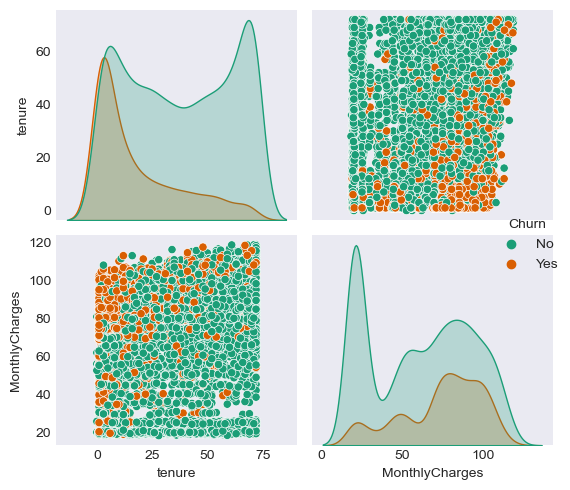

In [53]:
# Creamos un diagrama de pares para visualizar la relación entre las variables
plt.style.use('seaborn-dark')
sns.pairplot(df[['tenure','MonthlyCharges','Churn']],hue='Churn',palette='Dark2');
plt.tight_layout();

In [57]:
# Creamos un gráfico de pastel para visualizar la proporción de clientes desertores
churn_plot = df['Churn'].value_counts().reset_index()
churn_plot.columns = ['Churn?',"Number_of_customers"]
px.pie(churn_plot,values ="Number_of_customers",names='Churn?',title='Churn',template='none')

# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.

El caso de negocio propuesto no requiere la integración de otros datos.

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

## Análisis de datos con Tableau

![bbb](https://dev3lop.com/wp-content/uploads/2017/04/tableau-logo-tableau-software.jpg)

**Tableau** es una herramienta de Business Intelligence para analizar visualmente los datos. Los usuarios pueden crear y distribuir un panel de control interactivo y compartible, que representa las tendencias, las variaciones y la densidad de los datos en forma de gráficos y diagramas. Tableau puede conectarse a archivos, fuentes relacionales y de Big Data para adquirir y procesar datos. El software permite la combinación de datos y la colaboración en tiempo real, lo que lo hace muy singular. Es utilizado por empresas, investigadores académicos y muchas organizaciones gubernamentales para el análisis visual de datos.

Además, tiene más poder de visualización que Python, por lo que ambas herramientas combinadas nos proporciona una visión y perspectiva más clara de datos complejos.


In [58]:
%%HTML
<div class='tableauPlaceholder' id='viz1617687716045' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='useGuest' value='true' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1617687716045');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='2400px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

* Si hacemos clic en "Sí" para filtrar los clientes dados de baja en el Dashboard anterior, podemos observar que la mayoría de los cargos mensuales son superiores a los de los clientes existentes.

* Podemos observar que el servicio de Internet de fibra óptica de los usuarios son la mayoría de los que abandonaron el servicio de telecomunicaciones y fuera de 2.627 usuarios de fibra óptica 1.091 usuarios de fibra óptica 41% son abandonados el servicio de telecomunicaciones.

In [61]:
# Clasificamos los usuarios de fibra óptica
print('Total de usuarios de fibra óptica:',df[df['InternetService'] =='Fiber optic']['InternetService'].count())
print('\n')
print('No. de usuarios de fibra óptica (Churn = 0):',df[(df['Churn'] =='No')& (df['InternetService'] =='Fiber optic')]['InternetService'].count())
print('\n')
print('No. de usuarios de fibra óptica (Churn = 1):',df[(df['Churn'] =='Yes')& (df['InternetService'] =='Fiber optic')]['InternetService'].count())

Total de usuarios de fibra óptica: 2627


No. de usuarios de fibra óptica (Churn = 0): 1536


No. de usuarios de fibra óptica (Churn = 1): 1091


In [65]:
# Comparamos el cargo mensual de los que se quedan vs. los que se van
print('Cargo mensual promedio de los clientes que se quedan:',df[(df['Churn'] =='No')& (df['InternetService'] =='Fiber optic')]['MonthlyCharges'].median())
print('Cargo mensual promedio de los clientes que abandonan:',df[(df['Churn'] =='Yes')& (df['InternetService'] =='Fiber optic')]['MonthlyCharges'].median())

Cargo mensual promedio de los clientes que se quedan: 94.75
Cargo mensual promedio de los clientes que abandonan: 87.4


In [66]:
%%HTML
<div class='tableauPlaceholder' id='viz1617689871779' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_2' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1617689871779');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='2400px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Valores perdidos

In [76]:
# missing values
missing_value = 100* df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['Variables','missing values in percentage']
missing_value = missing_value.sort_values('missing values in percentage',ascending=False)

# barplot
fig = px.bar(missing_value, y='missing values in percentage',x='Variables',title='% Valores perdidos por variable',
             template='ggplot2',text='missing values in percentage');
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

Como se muestra en el gráfico anterior, no se han encontrado valores perdidos en el dataset.

## Limpieza de Datos

In [79]:
# Seleccionamos las variables categoricas
cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']
cat_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [81]:
# Seleccionamos las variables numericas
num_columns = ['TotalCharges','MonthlyCharges','tenure']
num_columns

['TotalCharges', 'MonthlyCharges', 'tenure']

In [83]:
# Realizamos un análisis descriptivo de las variables categoricas

#"""
for feature in df[cat_columns].columns:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print('1. Unique values:',df[feature].unique())
    print(' ')
    print('2. Min values:',df[feature].min())
    print(' ')
    print('3. value counts:',df[feature].value_counts(1)*100)
    print(' ')
    print('**************************************************')
    print('***************-end-******************************')
    print('\n ')

#"""


 
************* Column name: gender *************
1. Unique values: ['Male' 'Female']
 
2. Min values: Female
 
3. value counts: Male      50.952222
Female    49.047778
Name: gender, dtype: float64
 
**************************************************
***************-end-******************************

 

 
************* Column name: SeniorCitizen *************
1. Unique values: [0 1]
 
2. Min values: 0
 
3. value counts: 0    83.862345
1    16.137655
Name: SeniorCitizen, dtype: float64
 
**************************************************
***************-end-******************************

 

 
************* Column name: Partner *************
1. Unique values: ['Yes' 'No']
 
2. Min values: No
 
3. value counts: No     51.486803
Yes    48.513197
Name: Partner, dtype: float64
 
**************************************************
***************-end-******************************

 

 
************* Column name: Dependents *************
1. Unique values: ['Yes' 'No']
 
2. Min values: No
 


In [84]:
# Realizamos un análisis descriptivo de las variables numericas

for feature in df[num_columns].columns:
    print('*******','Column name:',feature,'*******')
    
    print('Min values:',df[feature].min())
    print('Max values:',df[feature].max())
    
    print('***********-end-***********')
    print('\n')

******* Column name: TotalCharges *******
Min values:  
Max values: 999.9
***********-end-***********


******* Column name: MonthlyCharges *******
Min values: 18.25
Max values: 118.75
***********-end-***********


******* Column name: tenure *******
Min values: 0
Max values: 72
***********-end-***********




Podemos evidenciar que los campos 'TotalCharges' y 'tenure' presentan registros con valores vacíos y 0, respectivamente

In [86]:
# Validamos los registros con valores vacíos en el campo 'TotalCharges'

df['TotalCharges'].min()

' '

In [87]:
# Seleccionamos los registros donde el campo 'TotalCharges' esta vacío

df[df['TotalCharges'] == df['TotalCharges'].min()][0:3]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No


In [89]:
# Reemplazamos los espacios vacíos por la mediana del campo 'TotalCharges'
df['TotalCharges'] =  df['TotalCharges'].replace(' ',2298.06)

In [90]:
# Cambiamos el tipo de dato a Float

df['TotalCharges'] =  df['TotalCharges'].astype(float)

In [93]:
# Validamos los registros con valores vacíos en el campo 'tenure'
df[df['tenure']==0][0:3]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,2298.06,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2298.06,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2298.06,No


In [96]:
# Reemplazamos los registros con valor 0 con la mediana del campo 'tenure'
df['tenure'] =  df['tenure'].replace(0,29)

# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

## Análisis de correlación

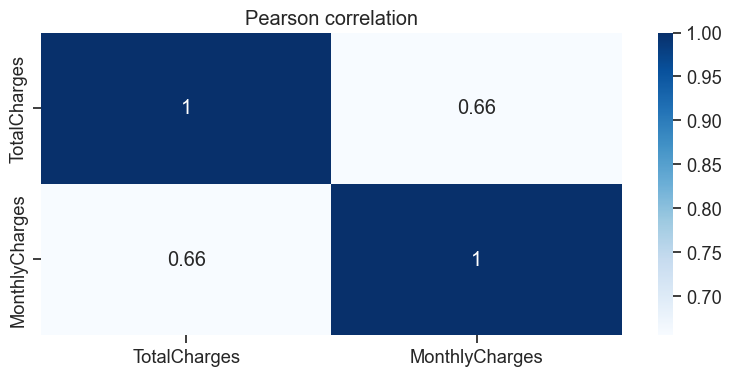

In [97]:
# Gráfico de correlación
plt.figure(figsize=(8,4))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df[['TotalCharges','MonthlyCharges']].corr('pearson'),annot=True,cmap='Blues');
plt.title('Pearson correlation');
plt.tight_layout();


Como se evidencia en el gráfico anteriore, los gastos mensuales tienen una correlación ligeramente positiva con los gastos totales.

## Transformación de Datos

In [99]:
# Transformamos las variables categoricas a numéricas
for features in df[cat_columns].columns:
    df[features] = pd.Categorical(df[features]).codes 

## Identificamos posibles Outliers

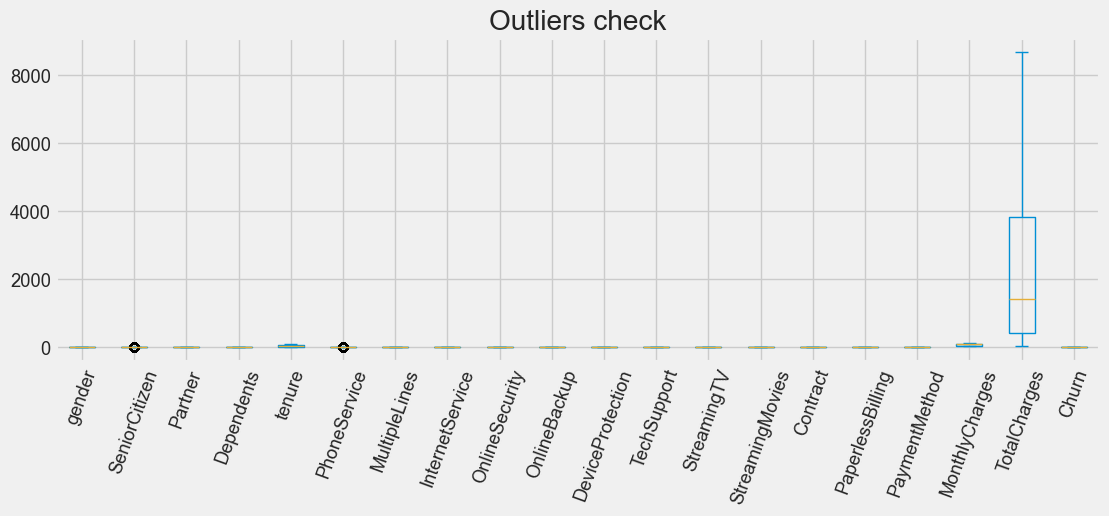

In [100]:
# Graficamos los valores atípicos
plt.style.use('fivethirtyeight')
df.plot(kind='box',figsize=(12,4))
plt.xticks(rotation=70);
plt.title('Outliers check');

In [101]:
#"""
def treat_outlier(x):
    sorted(x)
    q1,q3=np.percentile(x,[25,75])
    iqr=q3-q1
    l_r=q1-(1.5*iqr)
    u_r=q3+(1.5*iqr)
    return l_r,u_r  
#"

In [109]:
#"""

for i in df[num_columns].columns:
    lr,ur = treat_outlier(df[i])
    df[i] = np.where(df[i]>ur,ur,df[i])
    df[i] = np.where(df[i]<lr,lr,df[i])
#"""

## División de Datos

In [120]:
X= df.drop('Churn',axis=1)
y= df.pop('Churn')

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=30,random_state =1)

## Escalado de Datos

In [121]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

💡**Escalado de Datos:** El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1]. La normalización va a transformar las características de forma que todas compartan un mismo valor medio y una misma desviación media, por ejemplo.

## Sobremuestreo

In [122]:
## Sobremuestreo con SMOTE

SMOTE_oversample = SMOTE(random_state=1)
X_train,y_train = SMOTE_oversample.fit_resample(X_train, y_train.ravel())

# Implementación modelo Churn

## Modelo con Árboles de decisión

In [ ]:
# Importamos librerías
from sklearn.tree import DecisionTreeClassifier

In [125]:
DT_model= DecisionTreeClassifier(max_features= 5,max_depth= 10,min_samples_split= 90,min_samples_leaf= 30,random_state=1)

# Ajuste del modelo
DT_model.fit(X_train,y_train)

# Score modelo
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# Accuracy
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-Score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy en el set entrenamiento:',DT_train_score)
print('Accuracy en el set de prueba:',DT_test_score)
print('F1-score en el set de prueba:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))
print('\n')

# Matriz de confusión
metrics.plot_confusion_matrix(DT_model,X_test,y_test,cmap='Blues');
plt.grid(False)
plt.title('Matriz de confusión en set de prueba');


## Modelo con Random Forest

In [119]:
# Importamos librerías
from sklearn.ensemble import RandomForestClassifier

Accuracy on Train set 0.8312785388127854
Accuracy on Test set 0.7
F1-score on Test set: 0.5714285714285713


              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.60      0.55      0.57        11

    accuracy                           0.70        30
   macro avg       0.68      0.67      0.67        30
weighted avg       0.70      0.70      0.70        30





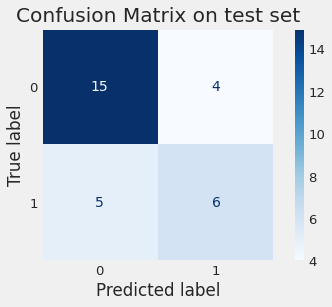

In [34]:
# Creamos el dataset para ejecutar el modelo
RF_model = RandomForestClassifier(n_estimators= 600,min_samples_split= 90,min_samples_leaf= 20,
                                  max_features= 5,max_depth= 10)# RF model tuned

# Ajuste del modelo
RF_model.fit(X_train,y_train)

# Score del modelo
predict_train_RF = RF_model.predict(X_train)
predict_test_RF = RF_model.predict(X_test)

# Accuracy
RF_train_score = RF_model.score(X_train,y_train)
RF_test_score = RF_model.score(X_test,y_test)

# f1-Score
RF_f1_score = metrics.f1_score(y_test,predict_test_RF)

print('Accuracy en el set entrenamiento:',RF_train_score)
print('Accuracy en el set de prueba:',RF_test_score)
print('F1-score en el set de prueba:',RF_f1_score)
print('\n')
print(metrics.classification_report(y_test,predict_test_RF))
print('\n')

# Matriz de confusión
metrics.plot_confusion_matrix(RF_model,X_test,y_test,cmap='Blues');
plt.grid(False)
plt.title('Confusion Matrix on test set');

## Modelo con XGBoost 

In [ ]:
# Importamos librerías
import xgboost as xgb

Accuracy on Train set 0.8337899543378996
Accuracy on Test set 0.7333333333333333
F1-score on Test set: 0.6363636363636364


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.64      0.64      0.64        11

    accuracy                           0.73        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.73      0.73      0.73        30





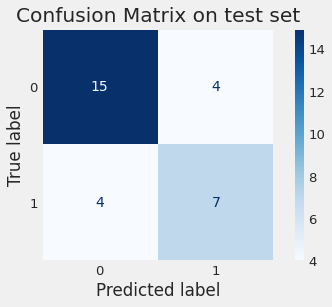

In [35]:
# Creamos el dataset para ejecutar el modelo
Xgboost_model = xgb.XGBClassifier(learning_rate=0.01,verbosity=0)

# Ajuste del modelo
Xgboost_model.fit(X_train,y_train)

# Score del modelo
predict_train_Xgb = Xgboost_model.predict(X_train)
predict_test_Xgb = Xgboost_model.predict(X_test)

# Accuracy
Xgb_train_score = Xgboost_model.score(X_train,y_train)
Xgb_test_score = Xgboost_model.score(X_test,y_test)

# f1-Score
Xgb_f1_score = metrics.f1_score(y_test,predict_test_Xgb)

print('Accuracy en el set entrenamiento:',Xgb_train_score)
print('Accuracy en el set de prueba:,Xgb_test_score)
print('F1-score en el set de prueba:',Xgb_f1_score)
print('\n')
print(metrics.classification_report(y_test,predict_test_Xgb))
print('\n')

# Matriz de confusión
metrics.plot_confusion_matrix(Xgboost_model,X_test,y_test,cmap='Blues');
plt.grid(False)
plt.title('Confusion Matrix on test set');

# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

## Comparativo de Modelos

El objetivo es seleccionar un modelo con buenas métricas. Se recomienda evaluar métricas como: 
* Confusion Matrix (Matriz de Confusión)
* Precision (Precisión)
* Recall (Exhaustividad)
* Accuracy (Exactitud)

In [38]:
models_list = [Xgboost_model,RF_model,DT_model]
recall =[]
precision =[]
test_acc = []
train_acc = []
f1score = []

for model in models_list:
    predict_test = model.predict(X_test)
    predict_train = model.predict(X_train)
    f1s = metrics.f1_score(y_test, predict_test)
    pre = metrics.precision_score(y_test, predict_test)
    rec = metrics.recall_score(y_test, predict_test)
    acc_test = model.score(X_test,y_test)
    acc_train = model.score(X_train,y_train)
    
    recall.append(rec)
    precision.append(pre)
    test_acc.append(acc_test)
    train_acc.append(acc_train)
    f1score.append(f1s)
    
model_compare = pd.DataFrame({
'Models':['XGboost','Random_Forest','Arbol_Decisión'],
'recall':recall,
'Precisión':precision,
'F1-Score':f1score,
'Accuracy en Prueba':test_acc,
'Accuracy en Entrenamiento':train_acc
})

In [39]:
model_compare.style.background_gradient(cmap='Blues')

,Models,recall,Precision,f1score,Accuracy on Test,Accuracy on Train
0,Xgboost,0.636364,0.636364,0.636364,0.733333,0.833790
1,Random_forest,0.545455,0.600000,0.571429,0.700000,0.831279
2,Decision_Tree,0.545455,0.600000,0.571429,0.700000,0.799772


## Conclusiones

* Los resultados de Random Forest y Arboles de decisión son muy similares en términos de precisión y recall (exhaustividad).
* En base a las metricas evaluadas, es recomendable utilizar el modelo **XGboost** para la predicción ya que presenta un balance de precisión y recall (exhaustividad).

## Referencias

1. https://xgboost.readthedocs.io/en/latest/tutorials/model.html
2. Precision, Recall, F1, Accuracy en clasificación https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/
3. Tutorial Tableau https://www.youtube.com/watch?v=6mBtTNggkUk